In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import skew
from scipy.stats import f_oneway


In [49]:
data =pd.read_csv("cars.csv")
data.head()


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


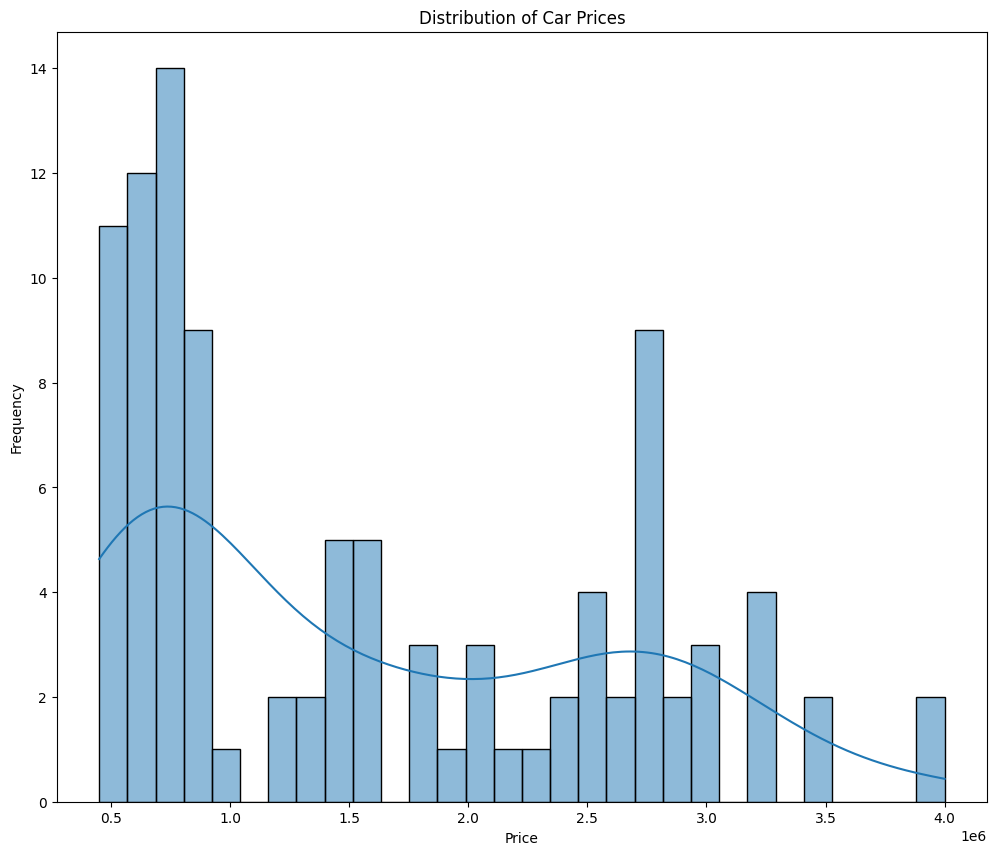

In [50]:
plt.figure(figsize=(12, 10))
sns.histplot(data['Price'], kde=True, bins=30)
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

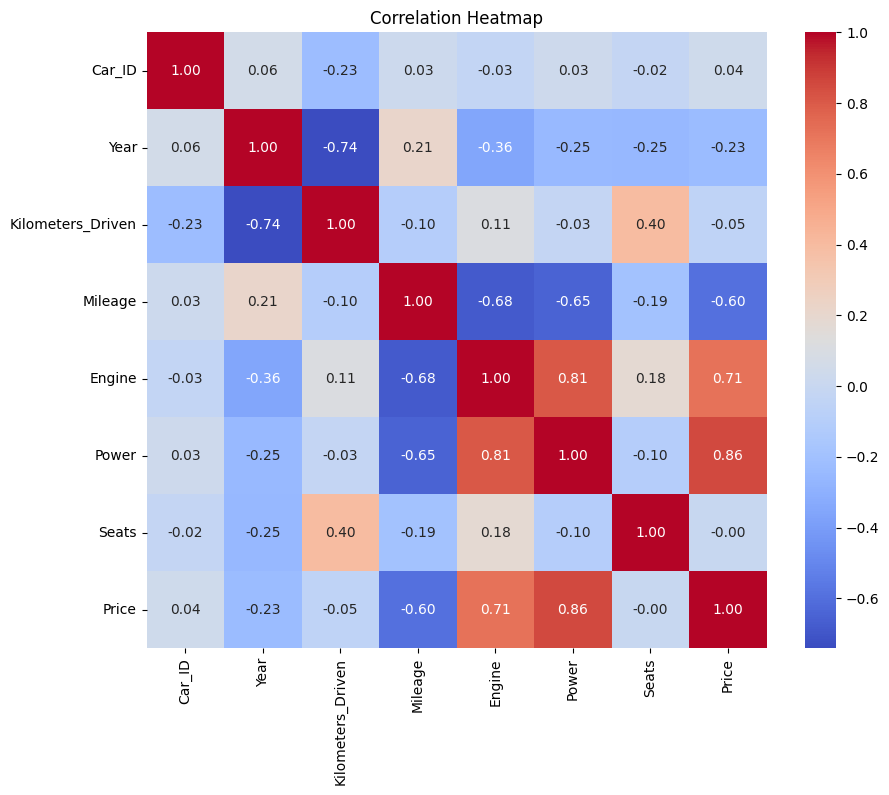

In [51]:
# Selecting only numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=[np.number])
# Correlation matrix
corr_matrix = numeric_data.corr()
# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder # label Encoding: for converting categorical data to numerical data
 
cat_col =["Brand", "Model", "Fuel_Type", "Transmission", "Owner_Type"] # creating a list of all categorical columns (make sure this list only contains categorical columns)

#Initializing Label Encoder
le= LabelEncoder()

# applying label encoding on the dataset using fit_transform method
for col in cat_col:
    data[col] = le.fit_transform(data[col])

In [60]:
data = data.dropna()
X = data.drop(columns=['Price'])  
Y = data['Price']


In [61]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [62]:
#scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [63]:
#XGBoost
xgb_model = xgb.XGBRegressor(random_state=42)


In [64]:
# random search 
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
xgb_random = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, 
                                n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)

In [65]:
xgb_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10, 15],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, verbose=2)

In [66]:
# Best parameters
print("Best Parameters:", xgb_random.best_params_)

# Evaluate on test set
y_pred = xgb_random.best_estimator_.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Best Parameters: {'subsample': 0.8, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 1.0}
R2 Score: 0.8949341177940369
MAE: 154382.9171875
RMSE: 293135.02760023926
